## Paula Perez y Valeria Quintanilla 

### Instalacion de la libreria
 


In [89]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [92]:
pip install seaborn 

In [93]:
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()

In [94]:
import pandas as pd 

In [95]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

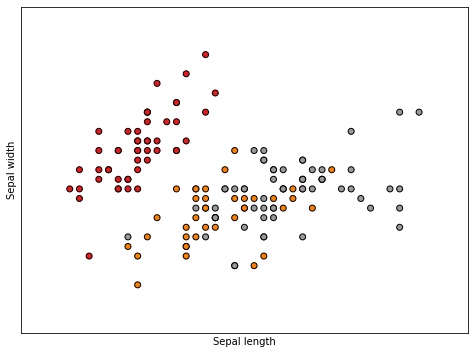

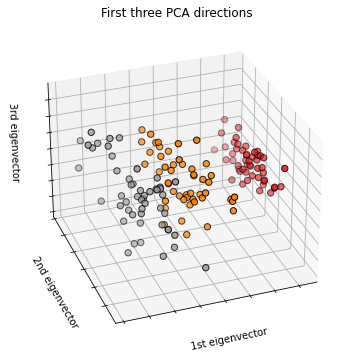

In [96]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [97]:
import seaborn as sns
iris= sns.load_dataset("iris")

In [98]:
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Entendemos que la base de datos tiene 5 variables de las cuales 4 son variables tipo float que me permiten entender:


 -Sepal length: Explica el largo del sépalo de las flores, en centimetros.

 -Sepal width: Explica el ancho del sépalo de las flores, en centimetros. 

 -Petal length: Explica la longitud del petalo en centimetros.

 -Petal width: Explica el ancho del petalo en centimetros.
 

La 5 variable es una variable categorica y permite entender:

 -Species: Explica la especie a la que puede pertenecer cada flor. Estas especies pueden ser:  Iris setosa, Iris versicolor o Iris virginica.
Se define que SEPAL WIDTH es nuestra variable de interes.

### Regresion logística multinomial

Para poder realizar la regresion logística multinomial, nos basamos en el siguiente codigo "

In [99]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt



import statsmodels.api as sm

En primer lugar, se asignaran los predictores y el criterio a cada objeto y se divide el dataset en una parte de entrenamiento y una parte de prueba.



In [100]:
x = iris.drop('species', axis=1)
y = iris['species']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

In [101]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [102]:
classifier = LogisticRegression()
classifier.fit(trainX, trainY)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred = classifier.predict(testX)
y_pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica'], dtype=object)

In [104]:
result = pd.DataFrame({'Actual' : testY, 'Predicted' : y_pred})
result

,Actual,Predicted
143,virginica,virginica
95,versicolor,versicolor
23,setosa,setosa
81,versicolor,versicolor
43,setosa,setosa
0,setosa,setosa
58,versicolor,versicolor
21,setosa,setosa
103,virginica,virginica
55,versicolor,versicolor


In [105]:
classifier.coef_

array([[-0.36909362,  0.81321206, -2.30322589, -1.01470953],
       [ 0.51058759, -0.25771649, -0.22102853, -0.76642639],
       [-0.14149397, -0.55549557,  2.52425442,  1.78113592]])

In [106]:
classifier.intercept_ 

array([  9.14195532,   1.87289005, -11.01484537])

In [107]:
print(classifier.predict_proba(x))

[[9.72513945e-01 2.74859866e-02 6.84783296e-08]
 [9.61084765e-01 3.89151070e-02 1.28192036e-07]
 [9.78225893e-01 2.17740490e-02 5.85100151e-08]
 [9.66736088e-01 3.32637420e-02 1.70202638e-07]
 [9.77274202e-01 2.27257394e-02 5.86606688e-08]
 [9.55055989e-01 4.49437012e-02 3.10012592e-07]
 [9.79650170e-01 2.03497369e-02 9.33619562e-08]
 [9.65738143e-01 3.42617331e-02 1.23517701e-07]
 [9.71788901e-01 2.82109661e-02 1.32644994e-07]
 [9.58128570e-01 4.18712930e-02 1.36556918e-07]
 [9.64711338e-01 3.52885728e-02 8.96352135e-08]
 [9.64653676e-01 3.53461331e-02 1.91041179e-07]
 [9.65090868e-01 3.49090373e-02 9.51395307e-08]
 [9.87678051e-01 1.23219282e-02 2.04183736e-08]
 [9.80205036e-01 1.97949480e-02 1.55469516e-08]
 [9.76895582e-01 2.31043530e-02 6.52126025e-08]
 [9.79949285e-01 2.00506693e-02 4.61248406e-08]
 [9.71842407e-01 2.81575030e-02 9.05055457e-08]
 [9.37625022e-01 6.23746953e-02 2.82522776e-07]
 [9.74776565e-01 2.52233372e-02 9.75691630e-08]
 [9.28941803e-01 7.10578548e-02 3.417480

En la matriz, cada fila representa una única observación, y cada columna representa la probabilidad de que se tome un tipo de especie dentro de la variable "especies, por lo cual, la primera columna explica la probabilidad de que esa observación tome el valor de "Setosa", la segunda columna explica la probabilidad de que esa observación tome el valor de "Versicolor" y la última columna explica la probabilidad de que esa observación tome el valor de "Virginica".

Por lo tanto, para la primera observación las probabilidades se distribuyen de la siguiente forma:

"Setosa": 9.76745911e-01 
"Versicolor": 2.32539546e-02
"Virginica": 1.34625361e-07

El mayor de esos es 9.76745911e-01 o 97.67%, por lo cual se determina que la primera observacion tomará el valor de "Setosa"

In [108]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(testY, y_pred)
cf_matrix

array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 13]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

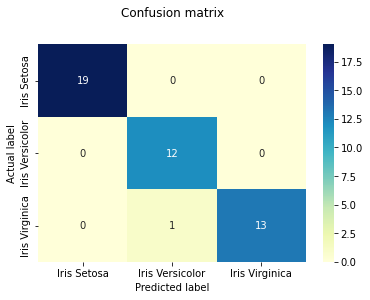

In [109]:
class_labels = ["Iris Setosa", "Iris Versicolor", "Iris Virginica"]
# Visualización de la matriz de confusión con etiquetas de clase
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu", fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Al visualizar el gráfico de la matriz de confusión, es posible afirmar que:

        En la primera fila, la clase setosa fue correctamente clasificada en 13 observaciones diferentes (TP), además no obtuvo clasificaciones incorrectas en otras clases.

        En la segunda fila, la clase Versicolor fue correctamente clasificada en 20 observaciones diferentes (TP), y obtuvo una clasificación incorrecta, categorizádose como "Virginica" (FP).

        En la tercera fila, la clase Virginica fue correctamente clasificada en 11 observaciones diferentes (TP), nuevamente no obtuvo clasificaciones incorrectas en otras clases.


En resumen, el modelo predijo de una forma correcta las flores de especie "Setosa" y las flores de especie "Virginica", sin embargo el modelo no fue del todo preciso al predecir las flores de especie "Versicolor", ya que, una observación se determinó como de especie "Virginica".


Teniendo en cuenta que:
                True Positives (TP): Representan el número de instancias que fueron clasificadas correctamente en su clase respectiva.

                False Positives (FP): Representan el número de instancias que fueron clasificadas incorrectamente como pertenecientes a una clase, cuando en realidad no lo eran.

                True Negatives (TN): Representan el número de instancias que fueron correctamente clasificadas como no pertenecientes a una clase en particular.

                False Negatives (FN): Representan el número de instancias que pertenecían a una clase, pero se clasificaron incorrectamente como otra clase.

Se determina para daca clase que:

**Setosa**

                True Positives (TP): 13

                False Positives (FP): 0

                False Negatives (FN): 0

**Versicolor**

                True Positives (TP): 20

                False Positives (FP): 1

                False Negatives (FN): 0

**Virginica**

                True Positives (TP): 11

                False Positives (FP): 0

                False Negatives (FN): 0

In [110]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 0.98
Error rate: 0.02


Se refiere a que el modelo predijo de forma correcta el 98% de los datos y obtuvo un error del 2% de los mismos.

In [111]:
accuracy_score(testY,y_pred)

0.9777777777777777

In [112]:
from sklearn.metrics import classification_report
target_names = ["Iris Setosa", "Iris Versicolor", "Iris Virginica"]
print(classification_report(testY, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

    Iris Setosa       1.00      1.00      1.00        19
Iris Versicolor       0.92      1.00      0.96        12
 Iris Virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



Por último, para explicar el reporte de clasificacion, nos enforcaremos en las métricas en lugar de las clases a las que una flor puede pertenecer.


**Precisión**

        % de obs correctamente clasificadas 
        
        En dos de las tres categorias a las que una flor puede pertenecer se predijo correctamente el 100% de los datos, para la categoria restante ("Virginica") el 92% de observaciones se predijo correctamente. 

**Recall**

        la capacidad del modelo para identificar correctamente los casos positivos reales 

        De todas las flores "Versicolor" presentes en el modelo, el modelo logró detectar correctamente 20 de ellas, cuanó el total las flores es 21. El modelo identifico correctamente el 95 % de estos datos y el 100% de los restantes.

**F1- SCORE**

        Combinación entre la precisión y el Recall

        Todas las clasificaciónes de flores tienen un F1-Score alto cercano a 1, por lo cual es posible inferir que el modelo cuenta con un buen equilibrio entre la precisión y el recall, lo que orienta a un buen rendimiento en la clasificación.

**Support**

        Número de muestras pertenecientes a una clase

        En total se tienen 45 muestras, de las cuales 13 pertenecen a la clase "Setosa", 21 a la clase "Versicolor" y 11 a la clase "Virginica"

" Tomado de (Multinomial Logistic Regression - Michael Fuchs Python, 2019)

En general, es un buen modelo de clasificación de flores utilicando la base de datos "iris", la mayoria de las metricas que permiten determinar la efctividad del modelo indican que es certero, por lo cual se establece que el modelo cumple con su objetivo. 

### KNN

Identificar la cantidad de filas y columnas contienen los datos con la propiedad de la forma

In [113]:
iris.shape

(150, 5)

In [114]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [115]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Recuento

In [116]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Dividir los datos en características y etiquetas

Determinar las columnas que contienen las características reales y dividir los datos en una matriz denominada "x" que serían las características y la matriz "y" que sería las etiquetas

In [117]:
futuras_columnas = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = iris[futuras_columnas].values
y = iris['species'].values

Transformar las etiquetas en números debido a que estas son categóricas y KNeighborsClassifier no acepta cadenas

Se usa LabelEncoder para hacer el proceso de transformación, teniendo en cuenta lo siguiente:

- setosa = 0
- versicolor = 1
- virginica = 2

In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Dividir el conjunto de datos en entrenamiento y en los de prueba, estp con el fin de verificar más adelante si el clasificador funciona correctamente o no.

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Visualización de los datos

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Gráfico de pares

Visualizamos la distribución de las variables o la relación entre estas por separado dentro de subconjuntos de su conjunto de datos.

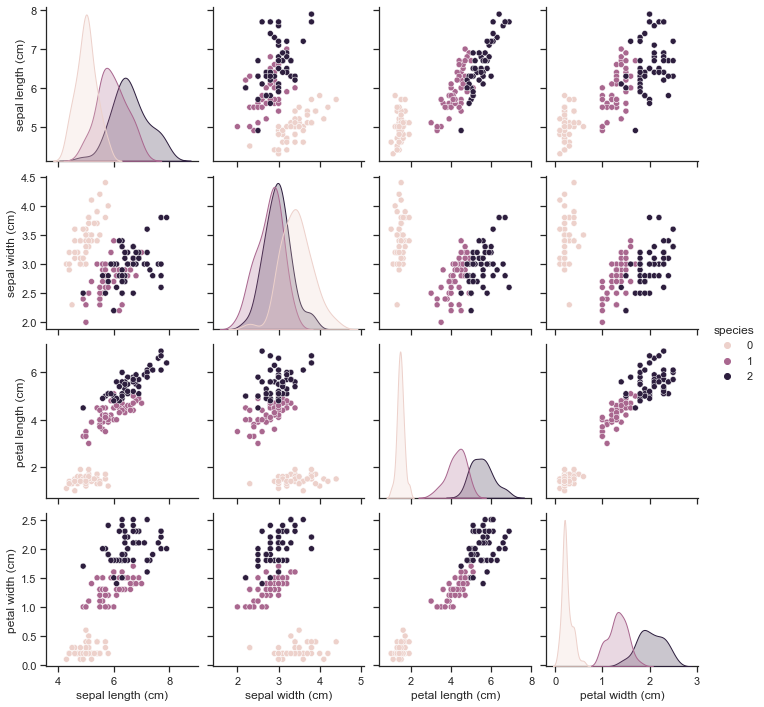

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
data = iris.data  # Características
target = iris.target  # Variable objetivo

# Crear un DataFrame de Pandas para el conjunto de datos
import pandas as pd
iris_df = pd.DataFrame(data, columns=iris.feature_names)

# Agregar la columna de especie (variable objetivo) al DataFrame
iris_df['species'] = target

# Crear un pair plot coloreado por especie
sns.set(style="ticks")
sns.pairplot(iris_df, hue="species")
plt.show()

Boxplots

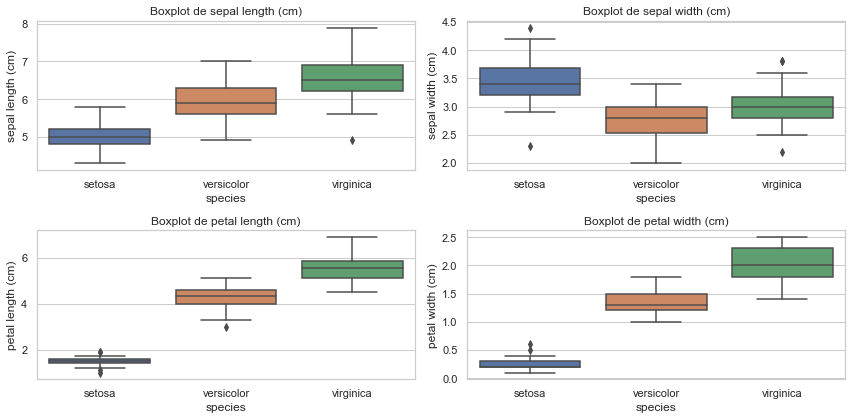

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
data = iris.data  # Características
target = iris.target  # Variable objetivo

# Crear un DataFrame de Pandas para el conjunto de datos
import pandas as pd
iris_df = pd.DataFrame(data, columns=iris.feature_names)

# Agregar la columna de especie (variable objetivo) al DataFrame
iris_df['species'] = iris.target_names[target]  # Mapear valores numéricos a nombres de especies

# Crear boxplots separados por especie para cada característica
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)  # Crear subplots
    sns.boxplot(x="species", y=feature, data=iris_df)  # Boxplot por especie
    plt.title(f"Boxplot de {feature}")
plt.tight_layout()
plt.show()

Visualización 3D

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11968\230923356.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=48, azim=134)


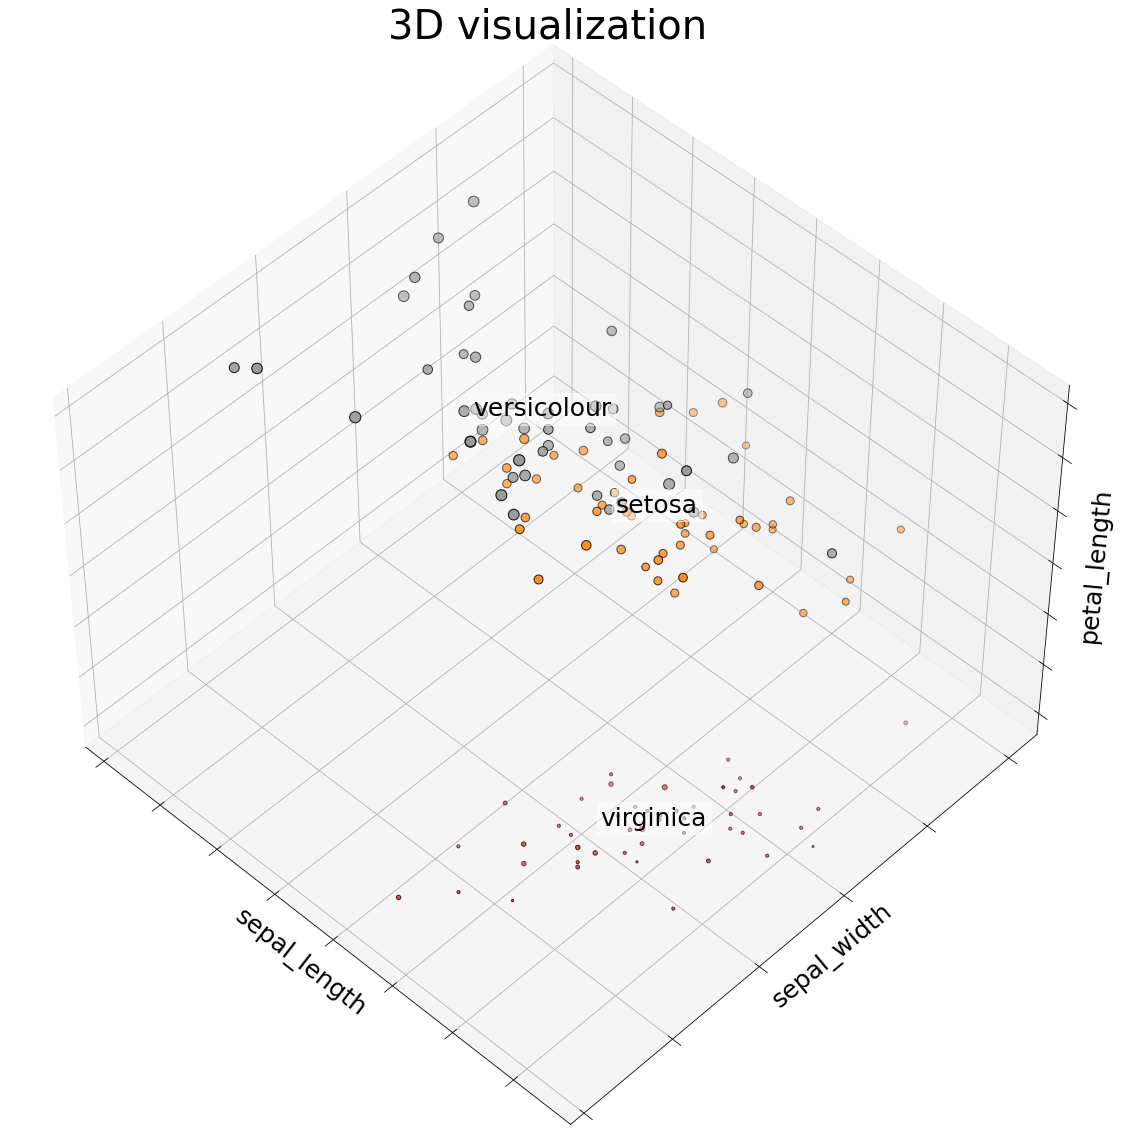

In [125]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('virginica', 0), ('setosa', 1), ('versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("sepal_length", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("sepal_width", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal_length", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

Usando KNN para la clasificación

Hacer predicciones

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# k=3
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Evaluar predicciones

Construyendo matriz de confusión

In [127]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

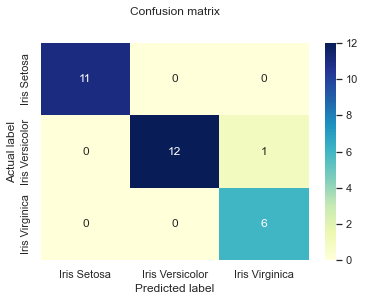

In [139]:
class_labels = ["Iris Setosa", "Iris Versicolor", "Iris Virginica"]
# Visualización de la matriz de confusión con etiquetas de clase
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accurracy del modelo

In [128]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


La matriz de confusión nos permite determinar los siguientes hechos, la clase setosa fue correctamente clasificada con 11/11 observaciones diferentes (TP), lo que indica que no obtuvo clasificaciones incorrectas en otras clases.
Continuamos con la clase Versicolor que fue correctamente clasificada en 12/13 observaciones diferentes (TP), y una clasificación incorrecta, esta en la categoría de "Virginica" (FP).
Finalmente, tenemos la clase Virginica, la cual fue correctamente clasificada en 6/6 observaciones diferentes (TP), lo que nos indica nuevamente, que no hubo alguna clasificación incorrecta, lo que nos lleva a concluir de todo el modelo, fue que este no obtuvo precisión solo en la clase "Versicolor" y de sólo una clasificada incorrectamente.

Para ser más específicosse obtuvieron los siguientes TP, Fp y FN

**Setosa**

                True Positives (TP): 11

                False Positives (FP): 0

                False Negatives (FN): 0

**Versicolor**

                True Positives (TP): 12

                False Positives (FP): 1

                False Negatives (FN): 0

**Virginica**

                True Positives (TP): 6

                False Positives (FP): 0

                False Negatives (FN): 0

cross-validation para el ajuste de parámetros

In [129]:
# lista de k para KNN
k_list = list(range(1,50,2))
# lista de cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

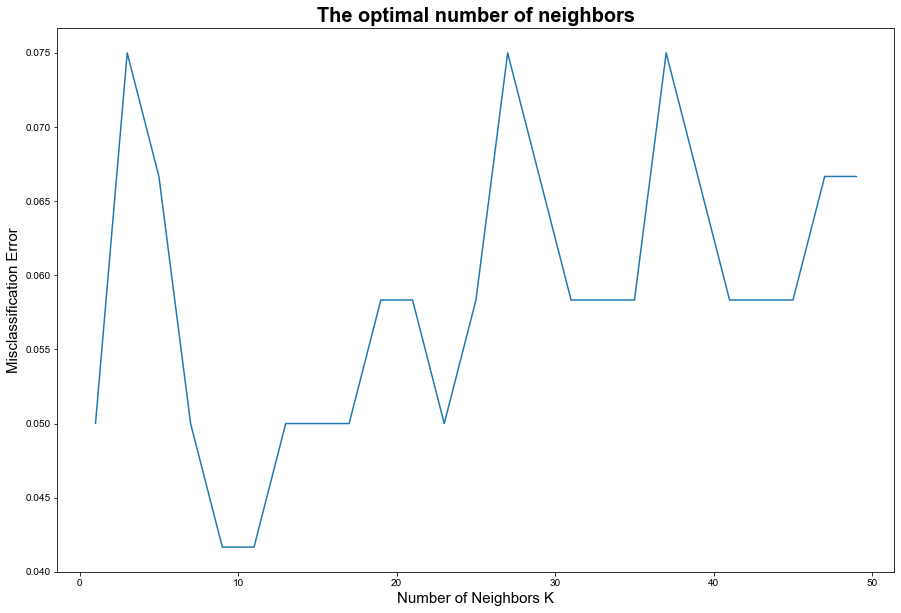

In [130]:
# cambiando a misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

Mejor K

In [132]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


Propia implementación de KNN

In [133]:
import numpy as np
import pandas as pd
import scipy as sp

class MyKNeighborsClassifier():
    """
    My implementation of KNN algorithm.
    """
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        """
        Fit the model using X as array of features and y as array of labels.
        """
        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return(predictions)

In [134]:
def single_prediction(X, y, x_train, k):
    
    # number of samples inside training set
    n_samples = X.shape[0]
    
    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_train - X[i]).dot(x_train - X[i])
    
    # combining arrays as columns
    distances = sp.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

In [135]:
# Instantiate learning model (k = 3)
my_classifier = MyKNeighborsClassifier(n_neighbors=3)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

In [136]:
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


Diagrama de Voronoi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11968\4093417547.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


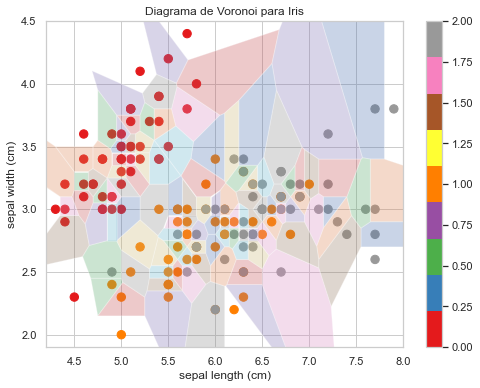

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
data = iris.data[:, :2]  # Tomar las primeras dos características
target = iris.target  # Variable objetivo

# Calcular el diagrama de Voronoi
vor = Voronoi(data)

# Crear el gráfico de Voronoi
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Set1, s=70, marker='o')
plt.colorbar()
plt.xlim(data[:, 0].min() - 0.1, data[:, 0].max() + 0.1)
plt.ylim(data[:, 1].min() - 0.1, data[:, 1].max() + 0.1)

for region in vor.regions:
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=0.3)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Diagrama de Voronoi para Iris")
plt.show()

Evaluando KNN para la clasificación

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



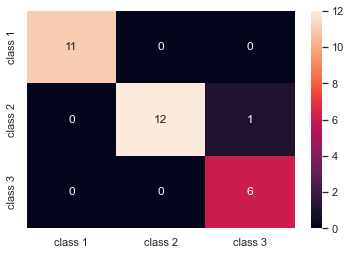

In [142]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Añadir nombres de clases para una mejor nterpretación
classes_names = ['class 1','class 2','class 3']

#Crear matriz de confusión
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
#Se utiliza Seaborn para crear un mapa de calor (heatmap) que visualiza la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d');

# El informe de clasificación proporciona una serie de métricas, incluyendo la precisión, el recall, la puntuación F1 
print(classification_report(y_test, y_pred))

Para cada una de las clases se evaluaron 3 aspectos la precisión, el recall y el f1-score, se obtuvo que para la clase 0 y 1, se obtuvo una presición del 100%, a diferencia de la clase 2 que se obtuvo una precisión del 86%. 

Teniendo en cuenta que el recall, es la proporción de las instancias positivas que fueron identificadas correctamente, tenemos que nuevamente para la clase 0 y 2 un recall del 100 %, lo que indica que el modelo identificó correctamente las instancias de esa clase y para la 1 un recall del 92%.

Finalmente, tenemos el F1-score, que combina el recall y la precisión en una sola métrica para aumentar este valor puesto que hay un desequilibrio en los tamaños de estas métricas a veces. Para la clase 0 f1-score de 1.0, y un score de 0.96 y 0.92 para la clase 1,2 respectivamente.

En resumidas cuentas se puede considerar que es un buen modelo debido a que su acurracy fue de 96.97%.


código tomado de: (Skalskip, 2017)

### Bibliografia

Multinomial Logistic Regression - Michael Fuchs Python. (2019, 15 noviembre). https://michael-fuchs-python.netlify.app/2019/11/15/multinomial-logistic-regression/

Skalskip. (2017). Iris data visualization and KNN classification. Kaggle. https://www.kaggle.com/code/skalskip/iris-data-visualization-and-knn-classification